In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [10]:
data = pd.read_excel('Data\IQ2.xls', index_col = 0)

2.1) Thể hiện những thông tin của dữ liệu

In [9]:
data.head()

,diemToan,diemAV,IQ
stt,,,
1,2.0,7.0,68
2,8.4,6.4,137
3,7.6,7.8,135
4,3.0,2.5,79
5,4.4,3.8,107


In [5]:
data.tail()

,diemToan,diemAV,IQ
stt,,,
16,9.0,9.2,128
17,3.6,6.3,120
18,4.8,8.1,113
19,6.0,5.2,121
20,8.6,6.7,138


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 3 columns):
diemToan    20 non-null float64
diemAV      20 non-null float64
IQ          20 non-null int64
dtypes: float64(2), int64(1)
memory usage: 640.0 bytes


In [7]:
data.shape

(20, 3)

- Vẽ biểu đồ phân bố tần số của diemToan

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


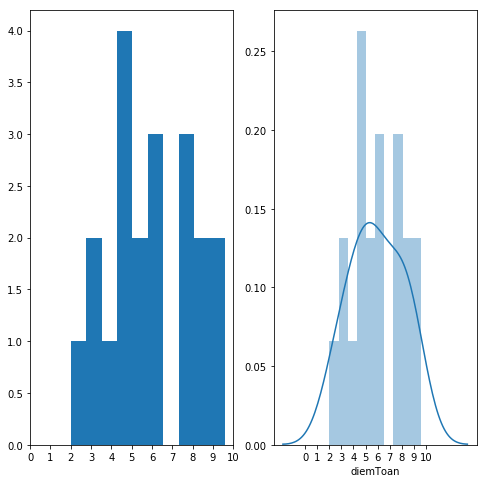

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.hist(data['diemToan'])
plt.xticks(np.arange(0, 11, step=1))
plt.subplot(1,2,2)
sb.distplot(data['diemToan'],bins=10)
plt.xticks(np.arange(0, 11, step=1))
plt.show()

- Vẽ biểu đồ phân bố tần số của diemAV

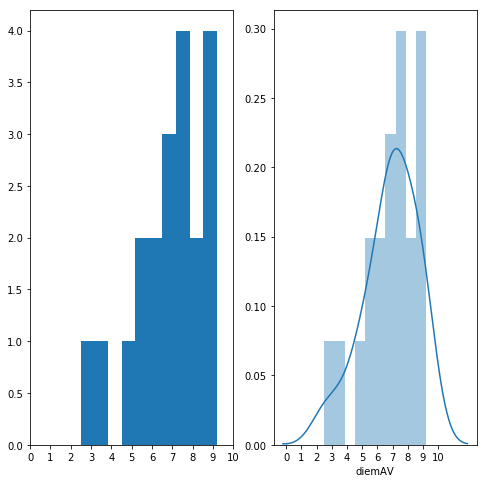

In [62]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.hist(data['diemAV'])
plt.xticks(np.arange(0, 11, step=1))
plt.subplot(1,2,2)
sb.distplot(data['diemAV'],bins=10)
plt.xticks(np.arange(0, 11, step=1))
plt.show()

In [15]:
diemToan = data['diemToan'].values
diemToan

array([2. , 8.4, 7.6, 3. , 4.4, 6.4, 8. , 2.8, 5.2, 6.4, 7.6, 5. , 9.6,
       5.6, 4.4, 9. , 3.6, 4.8, 6. , 8.6])

In [18]:
diemAV = data['diemAV'].values
diemAV

array([7. , 6.4, 7.8, 2.5, 3.8, 7.2, 8.4, 6.8, 5. , 8.9, 9.2, 5.4, 8.7,
       7.4, 7.2, 9.2, 6.3, 8.1, 5.2, 6.7])

2.2) Các giá trị mean, median, variance của diemToan và diemAV

In [20]:
# Tìm mean của diemToan
mean_diemToan = np.mean(diemToan)
mean_diemToan

5.92

In [21]:
# Tìm median của diemToan
median_diemToan = np.median(diemToan)
median_diemToan

5.8

In [22]:
# Tìm phương sai (variance) của diemToan
var_diemToan = np.var(diemToan)
var_diemToan

4.6575999999999995

In [23]:
# Tìm mean của diemAV
mean_diemAV = np.mean(diemAV)
mean_diemAV

6.859999999999999

In [24]:
# Tìm median của diemAV
median_diemAV = np.median(diemAV)
median_diemAV

7.1

In [25]:
# Tìm phương sai (variance) của diemAV
var_diemAV = np.var(diemAV)
var_diemAV

3.0553999999999997

2.3) Biểu đồ boxplot của diemToan, diemAV và IQ

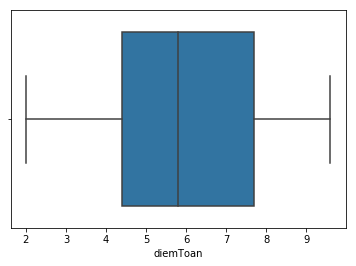

In [26]:
sb.boxplot(data['diemToan'])

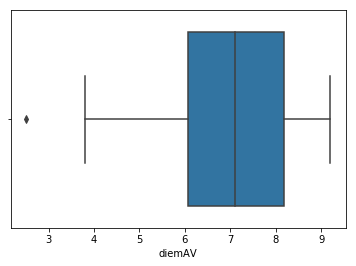

In [27]:
sb.boxplot(data['diemAV'])

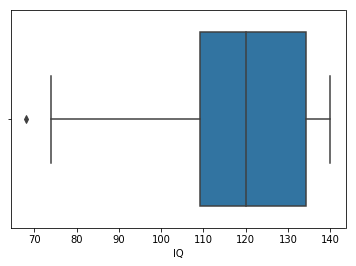

In [28]:
sb.boxplot(data['IQ'])

2.4) Xác định outliers của diemToan, diemAV và IQ

In [58]:
diemToan_z_score=stats.zscore(data['diemToan'])
outliers=diemToan_z_score[[(n<=-2.5)|(n>=2.5) for n in diemToan_z_score]]
indexes = [diemToan_z_score.tolist().index(i) for i in outliers]
print('Indexes of outliers in diemToan: ',indexes)
print('outliers values of diemToan: ',diemToan[indexes])

Indexes of outliers in diemToan:  []
outliers values of diemToan:  []


In [59]:
diemAV_z_score=stats.zscore(diemAV)
outliers=diemAV_z_score[[(n<=-2.5)|(n>=2.5) for n in diemAV_z_score]]
indexes = [diemAV_z_score.tolist().index(i) for i in outliers]
print('Indexes of outliers in diemAV: ',indexes)
print('outliers values of diemAV: ',diemAV[indexes])

Indexes of outliers in diemAV:  []
outliers values of diemAV:  []


In [60]:
IQ = np.array(data['IQ'])
IQ_z_score=stats.zscore(data['IQ'])
outliers=IQ_z_score[[(n<=-2.5)|(n>=2.5) for n in IQ_z_score]]
indexes = [IQ_z_score.tolist().index(i) for i in outliers]
print('Indexes of outliers in IQ: ',indexes)
print('outliers values of IQ: ',IQ[indexes])

Indexes of outliers in IQ:  []
outliers values of IQ:  []


2.5) Vẽ biểu đồ thể hiện mối quan hệ giữa diemToan và IQ. Tính giá trị tương quan giữa diemToan và IQ

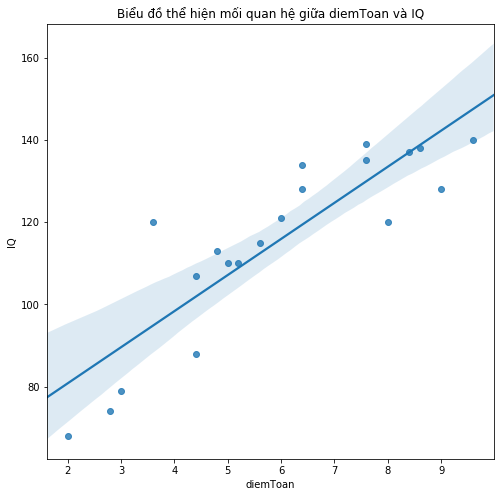

In [63]:
plt.figure(figsize=(8,8))
sb.regplot(x='diemToan',y='IQ',data=data)
plt.title("Biểu đồ thể hiện mối quan hệ giữa diemToan và IQ")
plt.show()

In [64]:
#Pandas corelation: default is Pearson
data['diemToan'].corr(data['IQ'])

0.872418870304112

In [65]:
stats.pearsonr(data['diemToan'],data['IQ'])

(0.8724188703041121, 5.304738079748869e-07)

Nhận xét: Dựa vào biểu đồ, ta nhận thấy diemToan và IQ tương quan dương với nhau. Với việc tính toán giá trị tương quan thì cho ta biết diemToan và IQ tương quan mạnh với nhau. Vì vậy, có thể dựa vào diemToan để dựa đoán IQ

2.6) Vẽ biểu đồ thể hiện mối quan hệ giữa diemToan và IQ. Tính giá trị tương quan giữa diemToan và IQ

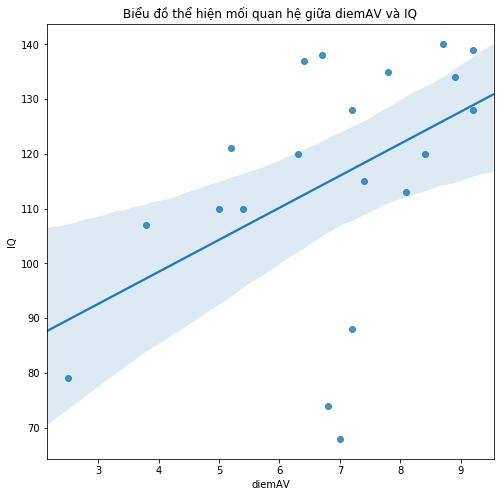

In [66]:
plt.figure(figsize=(8,8))
sb.regplot(x='diemAV',y='IQ',data=data)
plt.title("Biểu đồ thể hiện mối quan hệ giữa diemAV và IQ")
plt.show()

In [71]:
Sigma = np.corrcoef(diemAV,IQ)
Sigma

array([[1.        , 0.47152203],
       [0.47152203, 1.        ]])

In [72]:
stats.pearsonr(data['diemAV'],data['IQ'])

(0.47152202875062094, 0.03583549248975986)

In [74]:
# Spearman's corelation
stats.spearmanr(data['diemAV'],data['IQ'])

SpearmanrResult(correlation=0.5062147251722573, pvalue=0.022760253013121137)

Nhận xét: Dựa vào biểu đồ, ta nhận thấy diemAV và IQ không có mối tương quan. Với việc tính toán giá trị tương quan thì cho ta biết diemAV và IQ tương quan yếu với nhau. Vì vậy, khó có thể dựa vào diemAV để dựa đoán IQ

2.7) Dựa vào kết quả trên, ta chọn diemToan để dự đoán giá trị IQ.

2.8) Xây dựng hệ phương trình y=mx+b, với x là diemToan, y là IQ

In [76]:
from gradient_descent_2 import gradient_descent_2

In [77]:
m = diemToan.size
X = np.c_[np.ones(m),diemToan]
y = IQ
alpha=0.01
theta = gradient_descent_2(alpha,X,y,1000)

Iter 0 | J: 6059.502
Iter 1 | J: 2310.170
Iter 2 | J: 986.482
Iter 3 | J: 518.960
Iter 4 | J: 353.633
Iter 5 | J: 294.971
Iter 6 | J: 273.959
Iter 7 | J: 266.237
Iter 8 | J: 263.206
Iter 9 | J: 261.831
Iter 10 | J: 261.042
Iter 11 | J: 260.461
Iter 12 | J: 259.953
Iter 13 | J: 259.472
Iter 14 | J: 259.001
Iter 15 | J: 258.534
Iter 16 | J: 258.070
Iter 17 | J: 257.607
Iter 18 | J: 257.145
Iter 19 | J: 256.685
Iter 20 | J: 256.225
Iter 21 | J: 255.767
Iter 22 | J: 255.309
Iter 23 | J: 254.853
Iter 24 | J: 254.397
Iter 25 | J: 253.943
Iter 26 | J: 253.490
Iter 27 | J: 253.038
Iter 28 | J: 252.586
Iter 29 | J: 252.136
Iter 30 | J: 251.687
Iter 31 | J: 251.239
Iter 32 | J: 250.792
Iter 33 | J: 250.346
Iter 34 | J: 249.901
Iter 35 | J: 249.457
Iter 36 | J: 249.014
Iter 37 | J: 248.572
Iter 38 | J: 248.131
Iter 39 | J: 247.691
Iter 40 | J: 247.252
Iter 41 | J: 246.814
Iter 42 | J: 246.377
Iter 43 | J: 245.941
Iter 44 | J: 245.506
Iter 45 | J: 245.072
Iter 46 | J: 244.639
Iter 47 | J: 244.208


In [78]:
X[0:5]

array([[1. , 2. ],
       [1. , 8.4],
       [1. , 7.6],
       [1. , 3. ],
       [1. , 4.4]])

In [79]:
print("m = ",theta[1], "b =",theta[0])

m =  11.611847919445205 b = 44.28350236491087


In [80]:
for i in range(X.shape[1]):
    IQ_predict = theta[1]*X+theta[0]

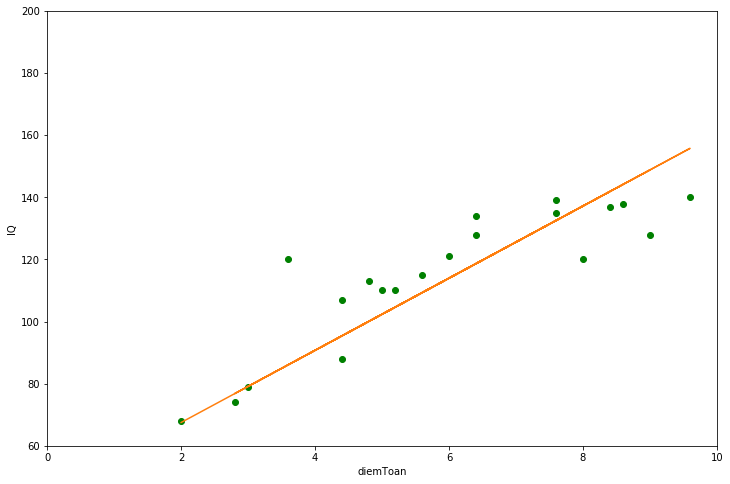

In [81]:
plt.figure(figsize=(12,8))
plt.xlim(0,10)
plt.ylim(60,200)
plt.scatter(X[:,1],IQ,color='green')
plt.plot(X,IQ_predict)
plt.xlabel("diemToan")
plt.ylabel("IQ")
plt.show()

In [82]:
diem = np.array([2.0,5.0,8.0,9.5])
I_Q = theta[1]*diem+theta[0]
I_Q=np.round(I_Q)
I_Q

array([ 68., 102., 137., 155.])